<h1> LABORATORIO 6</h1>
<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h1> ING DE SISTEMAS</h1>
<h1> Juan Sebastian Delgadillo Llanos</h1>
<h1> Rodrigo Jairo Loaiza Coronado</h1>
<h1> Diego Roberto Arancibia Delgado</h1>



In [95]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [97]:
data = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/Churn_Modelling.csv', delimiter=",")

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Paso 2: Preprocesamiento de datos
# Convertir características categóricas en variables numéricas usando codificación de etiquetas
label_encoder = LabelEncoder()

# Paso 3: Normalización de características
# Es una buena práctica normalizar las características para que tengan una media de 0 y una desviación estándar de 1.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # Excluimos las columnas no numéricas y no relevantes para el clustering

# Paso 4: Entrenar el modelo K-Means
k = 3 # Número de clusters que deseas
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(scaled_data)

# Paso 5: Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Paso 6: Analizar los resultados y realizar cualquier postprocesamiento necesario
# Por ejemplo, puedes agregar las etiquetas de los clusters al conjunto de datos original
data['Cluster'] = labels
import matplotlib.pyplot as plt



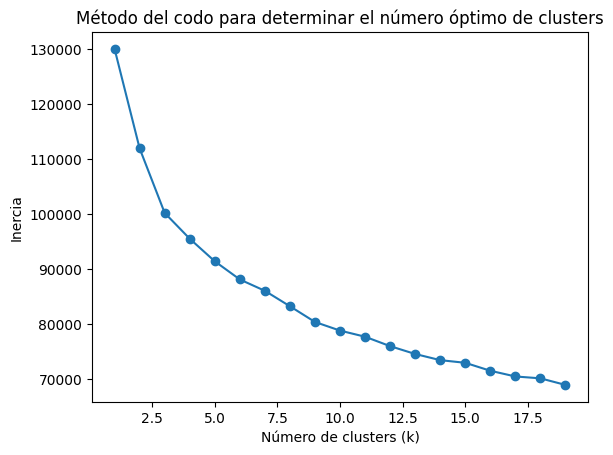

In [109]:
import matplotlib.pyplot as plt
# Lista para almacenar los valores de la inercia
inertia = []

# Rango de valores de k que quieres probar
k_range = range(1, 20)

# Itera sobre cada valor de k y calcula la inercia
for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Traza la curva del método del codo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


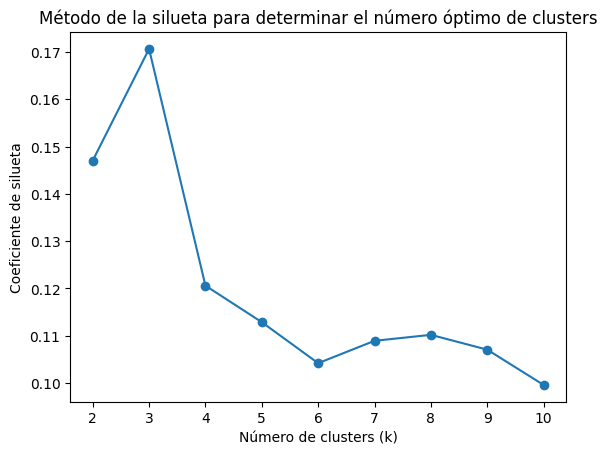

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Rango de valores de k que quieres probar
k_range = range(2, 11)  # Probamos desde 2 hasta 10 clusters

# Itera sobre cada valor de k y calcula el coeficiente de silueta
for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Traza la curva del método de la silueta
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.xticks(k_range)  # Ajustamos los ticks del eje x para mostrar todos los valores de k
plt.show()

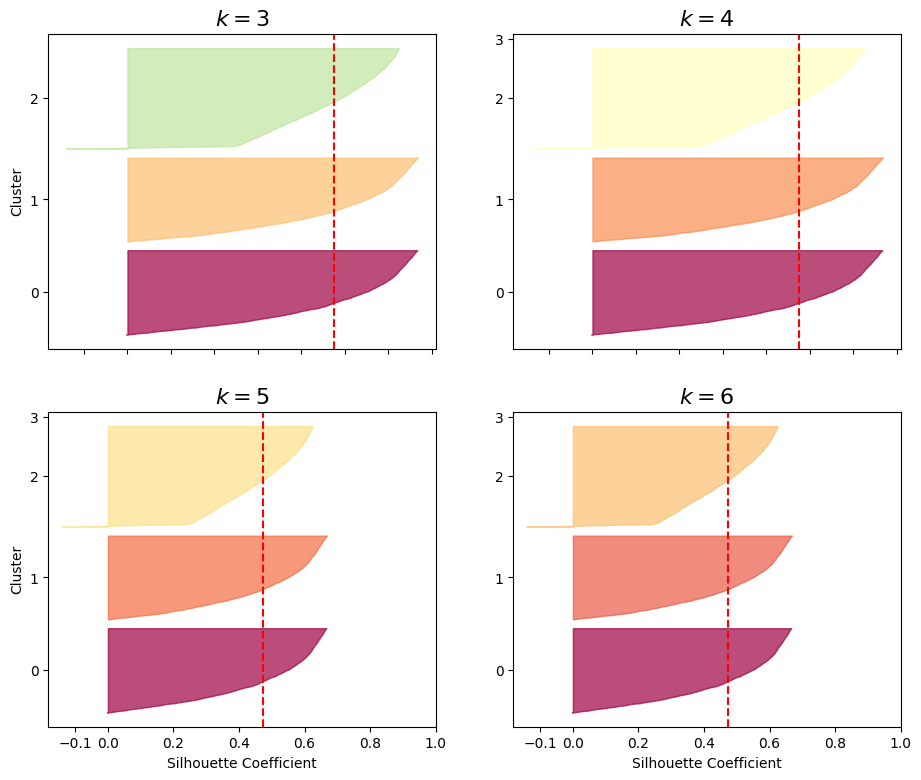

In [80]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(11, 9))

for k in range(3, 7):
    plt.subplot(2, 2, k - 2)

    y_pred = train_data['kmeans_3']  # Asegúrate de ajustar esto según el nombre de tu columna de etiquetas de clusters
    silhouette_coefficients = silhouette_samples(X_train_, y_pred)

    padding = len(X_train_) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Calcula y grafica el promedio del coeficiente de silueta para cada k
    silhouette_avg = silhouette_score(X_train_, y_pred)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


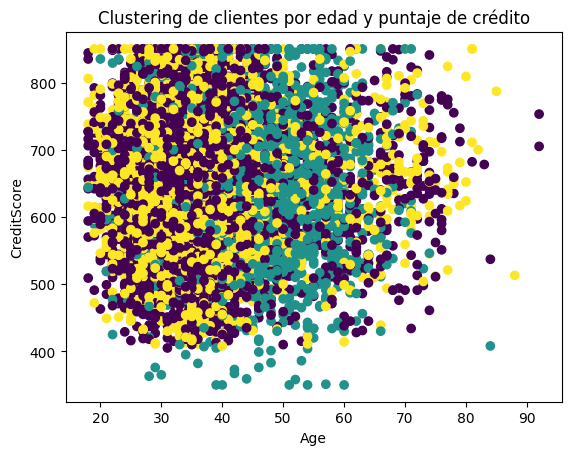

In [48]:
import matplotlib.pyplot as plt

# Trama de dispersión de los clusters
plt.scatter(data['Age'], data['CreditScore'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Clustering de clientes por edad y puntaje de crédito')
plt.show()

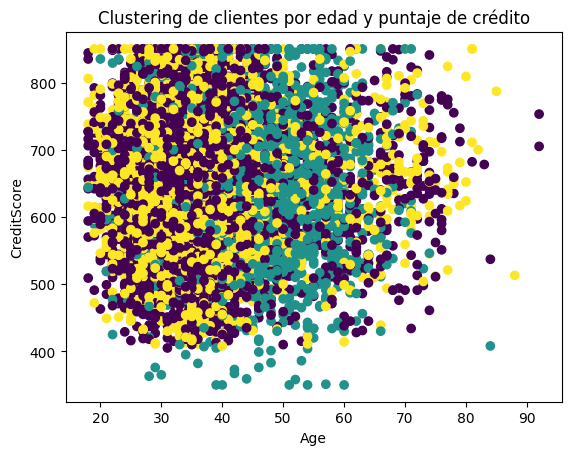

In [49]:
import matplotlib.pyplot as plt

# Trama de dispersión de los clusters
plt.scatter(data['Age'], data['CreditScore'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Clustering de clientes por edad y puntaje de crédito')
plt.show()

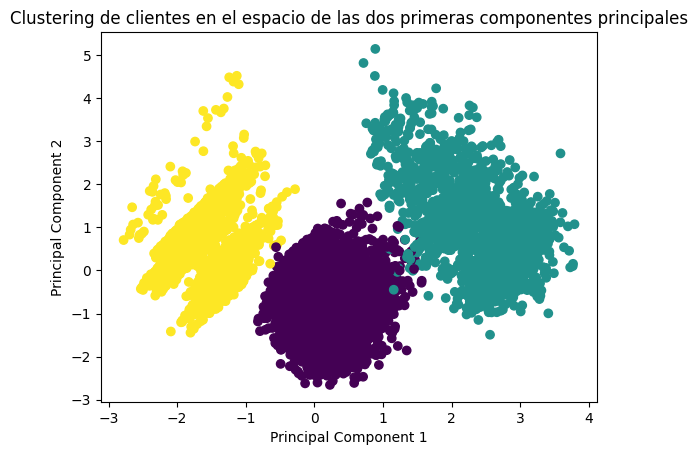

In [50]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Aplicando la librería, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Eliminando las columnas 'CustomerId' y 'Surname' del conjunto de entrenamiento y prueba
X_train = train_data.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y_train = train_data['Exited']

X_test = test_data.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y_test = test_data['Exited']

# Mostramos la cantidad de ejemplos que tienen X_train y X_test
print('-' * 80)
print("El 80% de ejemplos que serán para el entrenamiento son: {:.0f}".format(len(X_train)))
print("El 20% de ejemplos que serán para el prueba son: {:.0f}".format(len(X_test)))


--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 8000
El 20% de ejemplos que serán para el prueba son: 2000


In [55]:

X_train

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
9254,9255,686,0,1,32,6,0.00,2,1,1,179093.26,2
1561,1562,632,1,1,42,4,119624.60,2,1,1,195978.86,0
1670,1671,559,2,1,24,3,114739.92,1,1,0,85891.02,1
6087,6088,561,0,0,27,9,135637.00,1,1,0,153080.40,1
6669,6670,517,0,1,56,9,142147.32,1,0,0,39488.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,768,0,1,54,8,69712.74,1,1,1,69381.05,0
5191,5192,682,0,0,58,1,0.00,1,1,1,706.50,2
5390,5391,735,0,0,38,1,0.00,3,0,0,92220.12,1
860,861,667,0,1,43,8,190227.46,1,1,0,97508.04,1


In [56]:
import numpy as np

# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [57]:
X_train_

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
9254,36.294118,2.690196,0.000000,0.003922,0.125490,0.023529,0.000000,0.007843,0.003922,0.003922,702.326510,0.007843
1561,6.125490,2.478431,0.003922,0.003922,0.164706,0.015686,469.116078,0.007843,0.003922,0.003922,768.544549,0.000000
1670,6.552941,2.192157,0.007843,0.003922,0.094118,0.011765,449.960471,0.003922,0.003922,0.000000,336.827529,0.003922
6087,23.874510,2.200000,0.000000,0.000000,0.105882,0.035294,531.909804,0.003922,0.003922,0.000000,600.315294,0.003922
6669,26.156863,2.027451,0.000000,0.003922,0.219608,0.035294,557.440471,0.003922,0.000000,0.000000,154.855059,0.003922
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22.490196,3.011765,0.000000,0.003922,0.211765,0.031373,273.383294,0.003922,0.003922,0.003922,272.082549,0.000000
5191,20.360784,2.674510,0.000000,0.000000,0.227451,0.003922,0.000000,0.003922,0.003922,0.003922,2.770588,0.007843
5390,21.141176,2.882353,0.000000,0.000000,0.149020,0.003922,0.000000,0.011765,0.000000,0.000000,361.647529,0.003922
860,3.376471,2.615686,0.000000,0.003922,0.168627,0.031373,745.990039,0.003922,0.003922,0.000000,382.384471,0.003922


In [60]:
from sklearn.cluster import KMeans

k = 3  # Número de grupos

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
# Ajustar el modelo K-Means utilizando el conjunto de datos X_train_
kmeans.fit(X_train_)

# Agregar los grupos generados por KMeans a tu DataFrame train_data
train_data['kmeans_3'] = kmeans.labels_
# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# luego transforma estos datos en distancias euclidianas a los centroides de los clusters.
X_digits_dist = kmeans.fit_transform(X_train_)


In [61]:
train_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster,kmeans_3
9254,9255,15601116,P'an,686,0,1,32,6,0.00,2,1,1,179093.26,0,2,2
1561,1562,15766374,Leak,632,1,1,42,4,119624.60,2,1,1,195978.86,0,0,0
1670,1671,15716994,Green,559,2,1,24,3,114739.92,1,1,0,85891.02,1,1,1
6087,6088,15730759,Chukwudi,561,0,0,27,9,135637.00,1,1,0,153080.40,1,1,0
6669,6670,15797900,Chinomso,517,0,1,56,9,142147.32,1,0,0,39488.04,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,15596647,Henderson,768,0,1,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,5192,15681075,Chukwualuka,682,0,0,58,1,0.00,1,1,1,706.50,0,2,2
5390,5391,15573851,Macrossan,735,0,0,38,1,0.00,3,0,0,92220.12,1,1,2
860,861,15807663,McGregor,667,0,1,43,8,190227.46,1,1,0,97508.04,1,1,1


In [62]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(8000, 3)
[[485.58217346 691.78803367 314.12102718]
 [177.00932618 568.02010167 599.71684488]
 [256.56342073 139.21753898 447.92690812]
 ...
 [525.779229   502.58891741  27.57408389]
 [344.91676845 325.71577325 740.9562234 ]
 [396.87489611 104.70087785 601.95741008]]


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Instancia del modelo de regresión logística
logistic_regression = LogisticRegression()

# Ajustar el modelo de regresión logística a los datos de entrenamiento
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular el porcentaje de precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el porcentaje de precisión
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.797


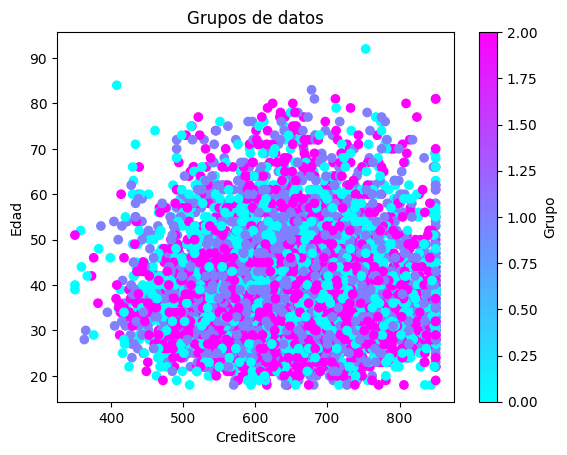

In [69]:
# Graficar los grupos
plt.scatter(train_data['CreditScore'], train_data['Age'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Edad')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

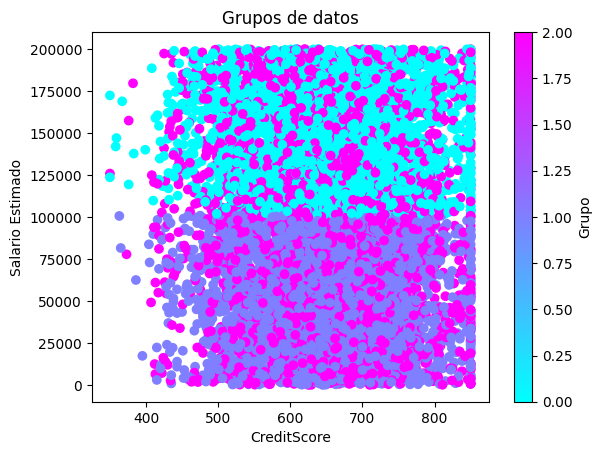

In [73]:
# Graficar los grupos
plt.scatter(train_data['CreditScore'], train_data['EstimatedSalary'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Salario Estimado')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [87]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[1000]

# Realizamos la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict([datos_nuevos])

# Imprimimos la predicción
print("Predicción:", prediccion)


Predicción: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


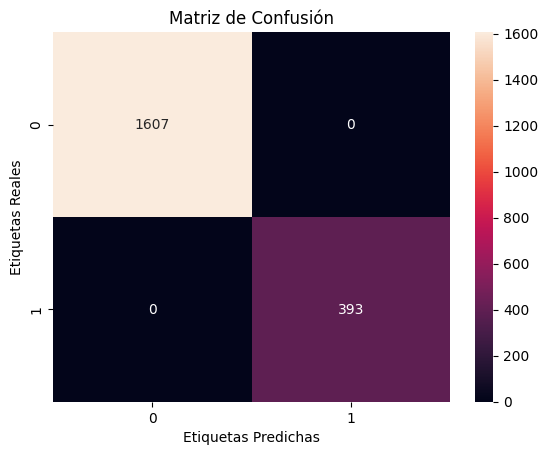

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()
